In [1]:
# Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [4]:
# Data Generation
observations = 1000

xs = np.random.uniform(-10,10, size=(observations, 1))
zs = np.random.uniform(-10,10, size=(observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, size=(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

# Save tensor into .npz file (label_name=variable_name)
np.savez('TF_intro', inputs=generated_inputs, targets = generated_targets)

### Solving with TensorFlow

In [6]:
training_data = np.load('TF_intro.npz')

In [23]:
input_size = 2 # xs and zs = 2 count
output_size = 1 # y is out = 1 count

# Sequential function specifies howthe model will be laid down 'stack layers'
# Linear combination + output = layer
model = tf.keras.Sequential([
    # takes the inputs provided to the model and calcs the dot product
    # of the input and the weights and adds the bias
    # output = np.dot(inputs,weights) + bias
    tf.keras.layers.Dense(
        output_size,
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), # weight initializer (opt)
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1) # bias initializer (opt)
        
    )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# SGD - stocastic gradient descent
# Objective function - mean_squared_error
# model.compile(optimizer='sgd', loss='mean_squared_error') -- without custom optimize
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Indicate which data to fit
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 26.6752
Epoch 2/100
32/32 - 0s - loss: 1.2253
Epoch 3/100
32/32 - 0s - loss: 0.4512
Epoch 4/100
32/32 - 0s - loss: 0.4000
Epoch 5/100
32/32 - 0s - loss: 0.4007
Epoch 6/100
32/32 - 0s - loss: 0.4084
Epoch 7/100
32/32 - 0s - loss: 0.3658
Epoch 8/100
32/32 - 0s - loss: 0.3871
Epoch 9/100
32/32 - 0s - loss: 0.3990
Epoch 10/100
32/32 - 0s - loss: 0.4406
Epoch 11/100
32/32 - 0s - loss: 0.3978
Epoch 12/100
32/32 - 0s - loss: 0.3826
Epoch 13/100
32/32 - 0s - loss: 0.4024
Epoch 14/100
32/32 - 0s - loss: 0.3764
Epoch 15/100
32/32 - 0s - loss: 0.3739
Epoch 16/100
32/32 - 0s - loss: 0.3842
Epoch 17/100
32/32 - 0s - loss: 0.4094
Epoch 18/100
32/32 - 0s - loss: 0.4172
Epoch 19/100
32/32 - 0s - loss: 0.4025
Epoch 20/100
32/32 - 0s - loss: 0.4093
Epoch 21/100
32/32 - 0s - loss: 0.4072
Epoch 22/100
32/32 - 0s - loss: 0.3974
Epoch 23/100
32/32 - 0s - loss: 0.4078
Epoch 24/100
32/32 - 0s - loss: 0.3909
Epoch 25/100
32/32 - 0s - loss: 0.4101
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weights and bias

In [24]:
model.layers[0].get_weights()

[array([[ 2.0360003],
        [-2.9833024]], dtype=float32),
 array([4.9861517], dtype=float32)]

### Extract the outputs by making prediction

In [25]:
model.predict_on_batch(training_data['inputs'])

# Outputs compared to the actual target

array([[ 1.91126709e+01],
       [-2.33857422e+01],
       [ 9.15590382e+00],
       [-3.62179661e+00],
       [ 1.71698799e+01],
       [-1.87998695e+01],
       [ 1.73769341e+01],
       [ 1.18074274e+01],
       [ 4.16753731e+01],
       [-2.14585800e+01],
       [ 4.52649307e+01],
       [-9.32072926e+00],
       [ 4.56427689e+01],
       [-2.17900696e+01],
       [ 1.95259590e+01],
       [ 8.07071114e+00],
       [-3.92999458e+00],
       [-1.20772257e+01],
       [ 3.92172432e+00],
       [-1.73018608e+01],
       [ 6.99295712e+00],
       [ 4.81287880e+01],
       [ 4.66582031e+01],
       [ 1.54589405e+01],
       [ 4.05081787e+01],
       [ 4.09525261e+01],
       [ 1.14641666e+00],
       [ 2.30476532e+01],
       [-2.96569443e+01],
       [-5.21484661e+00],
       [ 2.19089546e+01],
       [ 3.31741829e+01],
       [ 8.83506870e+00],
       [-2.18398056e+01],
       [ 2.93172741e+00],
       [-3.92208710e+01],
       [ 9.17322350e+00],
       [ 2.31418610e-01],
       [ 4.3

In [28]:
training_data['targets'].round(1)

array([[ 18.5],
       [-22.9],
       [  9.2],
       [ -3.3],
       [ 17.7],
       [-17.5],
       [ 16.5],
       [ 12.5],
       [ 42.4],
       [-20.8],
       [ 45.6],
       [ -9.4],
       [ 45.2],
       [-22.9],
       [ 19.8],
       [  7.4],
       [ -3.6],
       [-12.3],
       [  3.8],
       [-18.1],
       [  7.5],
       [ 47.9],
       [ 46.3],
       [ 14.8],
       [ 40.9],
       [ 39.9],
       [  0.7],
       [ 24.1],
       [-29. ],
       [ -5.4],
       [ 23.1],
       [ 34. ],
       [  8.4],
       [-22.6],
       [  2.9],
       [-39.5],
       [  8.4],
       [ -0.2],
       [ 44.1],
       [ 21. ],
       [ 35.5],
       [-21. ],
       [ 12.7],
       [ 21.4],
       [-22.3],
       [-13.8],
       [-18.9],
       [ 32.9],
       [ 11.7],
       [  7.5],
       [-17.1],
       [ 21.8],
       [  7.1],
       [-13.9],
       [-28.6],
       [-19.2],
       [ 11.4],
       [-20.5],
       [ -6.5],
       [ 31.5],
       [-16.6],
       [ 31.3],
       [

### Plotting the data

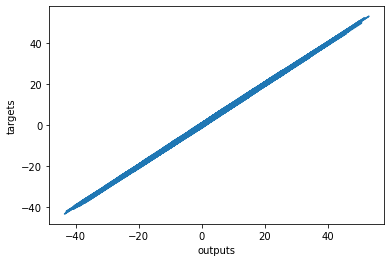

In [29]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [ ]:
p